<a href="https://colab.research.google.com/github/ranna-waleed/DSAI-305_Loan-Default-Prediction/blob/main/Mariam_Alhaj_XAI_Model(2)_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

paper : https://scispace.com/pdf/machine-learning-based-loan-default-prediction-in-peer-to-a7r7qmgcd0.pdf

best model : Logistic Regression with Bagging

In [ ]:
!pip install artemis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 6.0 MB/s eta 0:00:00


In [ ]:
!pip install pyartemis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 46.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pa

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.5 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=af84b8424e093063758e7f0227f45db2dc6960a1cbf93a5bd2bb32c5cc68f1b9
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
  Attempting uninstall: networkx
    Found existing installation: networkx 2.8.8
    Uninstalling networkx-2.8.8:
      Successfully uninstalled networkx-2.8.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyartemis 0.1.5 requires networkx<3.0.0,>=2.8.8, but you have networkx 3.4.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" an

In [ ]:
!pip install alibi

INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of spacy[lookups] to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.1/522.1 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.8 MB/s eta 0:00:00

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import shap
from alibi.explainers import ALE, plot_ale
from sklearn.model_selection import cross_val_score
import sklearn
from sklearn.ensemble import RandomForestClassifier
import lime
import lime.lime_tabular
import numpy as np
from sklearn.preprocessing import LabelEncoder
from artemis.interactions_methods.model_agnostic import FriedmanHStatisticMethod
import random

#1- Model

In [ ]:
#load the preprocessed dataset
df = pd.read_csv("/content/final_loan_data_leakproof.csv")
df.head()

,int_rate,dti,dti_ratio,term_ 60 months,issue_d_year,home_ownership_RENT,addr_state_MI,sub_grade,addr_state_WA,loan_to_income,acc_open_past_24mths,addr_state_AZ,debt_settlement_flag_Y,grade,issue_d_month,credit_history_years,target
0,15.88,5.89,0.0589,False,2013,True,False,3.3,False,0.128205,7.0,False,False,3,7,13.0,0
1,11.99,21.06,0.2106,False,2014,False,False,2.2,False,0.041860,7.0,False,False,2,3,25.0,0
2,12.87,11.52,0.1152,False,2009,False,False,3.0,False,0.246154,4.0,False,False,3,9,13.0,0
3,12.79,6.03,0.0603,False,2016,False,False,3.0,False,0.188889,8.0,False,False,3,7,19.0,1
4,23.99,22.18,0.2218,False,2016,False,False,5.1,False,0.097596,5.0,False,False,5,8,39.0,0


In [ ]:
#features & target
X = df.drop(columns=['target', 'debt_settlement_flag_Y'])
Y = df['target']

In [ ]:
X['term_ 60 months'] = X['term_ 60 months'].astype(int)
X['home_ownership_RENT'] = X['home_ownership_RENT'].astype(int)
X['addr_state_MI'] = X['addr_state_MI'].astype(int)
X['addr_state_WA'] = X['addr_state_WA'].astype(int)
X['addr_state_AZ'] = X['addr_state_AZ'].astype(int)

print(X.dtypes)

int_rate                float64
dti                     float64
dti_ratio               float64
term_ 60 months           int64
issue_d_year              int64
home_ownership_RENT       int64
addr_state_MI             int64
sub_grade               float64
addr_state_WA             int64
loan_to_income          float64
acc_open_past_24mths    float64
addr_state_AZ             int64
grade                     int64
issue_d_month             int64
credit_history_years    float64
dtype: object


In [ ]:
X.head()

,int_rate,dti,dti_ratio,term_ 60 months,issue_d_year,home_ownership_RENT,addr_state_MI,sub_grade,addr_state_WA,loan_to_income,acc_open_past_24mths,addr_state_AZ,grade,issue_d_month,credit_history_years
0,15.88,5.89,0.0589,0,2013,1,0,3.3,0,0.128205,7.0,0,3,7,13.0
1,11.99,21.06,0.2106,0,2014,0,0,2.2,0,0.041860,7.0,0,2,3,25.0
2,12.87,11.52,0.1152,0,2009,0,0,3.0,0,0.246154,4.0,0,3,9,13.0
3,12.79,6.03,0.0603,0,2016,0,0,3.0,0,0.188889,8.0,0,3,7,19.0
4,23.99,22.18,0.2218,0,2016,0,0,5.1,0,0.097596,5.0,0,5,8,39.0


In [ ]:
#split the data set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [ ]:
#build the model
lg_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
bg_model = BaggingClassifier(estimator = lg_model, n_estimators = 10, random_state = 42)

In [ ]:
#fit the model
bg_model.fit(x_train, y_train)

BaggingClassifier(estimator=Pipeline(steps=[('standardscaler',
                                             StandardScaler()),
                                            ('logisticregression',
                                             LogisticRegression(max_iter=1000))]),
                  random_state=42)

In [ ]:
#prediction
results = bg_model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, results))

Accuracy: 0.805


In [ ]:
#evaluation report
print("\n Report:\n", classification_report(y_test, results))


 Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89      8023
           1       0.54      0.09      0.16      1977

    accuracy                           0.81     10000
   macro avg       0.68      0.54      0.53     10000
weighted avg       0.76      0.81      0.75     10000



In [ ]:
cm = confusion_matrix(y_test, results)
cm

array([[7863,  160],
       [1790,  187]])

# 2- Explainability Techniques

In [ ]:
feature_names = X.columns.tolist()
target_names = ['No Default', 'Default']

2.1- H-Statistic

In [ ]:
random.seed(8)
X_exp = X.sample(n=100, replace=True, random_state=8)
X_exp = pd.DataFrame(X_exp, columns = X.columns)

In [ ]:
h_stat = FriedmanHStatisticMethod()
h_stat.fit(bg_model, X_exp)

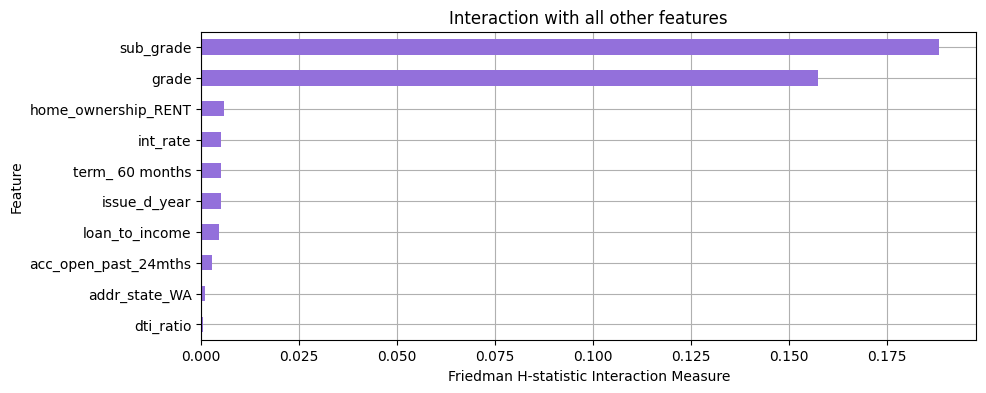

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
h_stat.plot('bar_chart_ova',ax=ax)

In [ ]:
fig.savefig('friedman_h_statistic_bg_model.png', bbox_inches='tight', dpi=300)

2.2- LOFO

In [ ]:
base_line = cross_val_score(bg_model, x_train, y_train, cv = 5).mean()

In [ ]:
lofo_scores = {}

for c in X.columns:
  x_lofo = x_train.drop(columns=[c])
  score = cross_val_score(bg_model, x_lofo, y_train, cv = 5).mean()
  lofo_scores[c] = base_line - score

<Axes: >

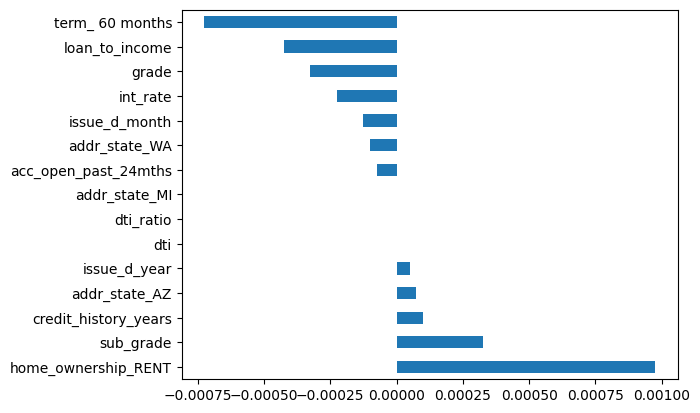

In [ ]:
lofo_df = pd.Series(lofo_scores).sort_values(ascending = False)
lofo_df.plot(kind = 'barh')

2.3 - SHAP

In [ ]:
X_15000 = X.sample(n=15000, random_state=42)

In [ ]:
explainer = shap.Explainer(bg_model.predict, X_15000)

In [ ]:
shap_values = explainer(X_15000)

PermutationExplainer explainer: 15001it [1:21:48,  3.05it/s]


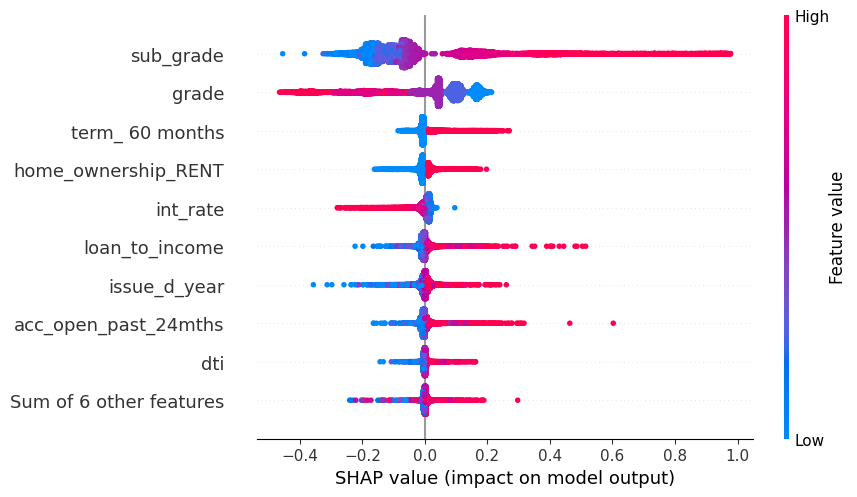

In [ ]:
shap.plots.beeswarm(shap_values)

2.4 - LIME

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data = x_train.values,
    feature_names = feature_names,
    class_names = target_names,
    mode = 'classification'
)

In [ ]:
sample = x_test.iloc[10]

exp = explainer.explain_instance(
    sample.to_numpy(),
    bg_model.predict_proba,
    num_features=10
)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
exp.show_in_notebook(show_table=True, show_all=False)

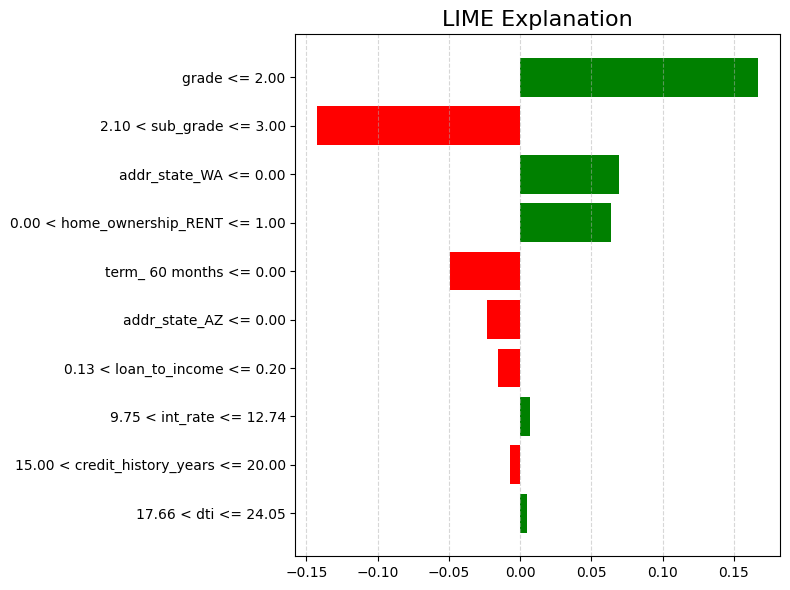

In [ ]:
fig = exp.as_pyplot_figure()
fig.set_size_inches(8, 6)
plt.title("LIME Explanation", fontsize=16)
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
fig.savefig("lime_explanation_bg_model.png", dpi=300, bbox_inches='tight')
plt.show()